In [1]:

import pandas as pd
import numpy as np
df= pd.read_csv("Unemployment in India.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural


In [2]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [3]:
df.shape

(740, 7)

In [11]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values(by='Date')
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural
290,Telangana,2019-05-31,Monthly,2.23,11053353,61.74,Rural
276,Tamil Nadu,2019-05-31,Monthly,0.97,15844698,49.44,Rural
257,Rajasthan,2019-05-31,Monthly,4.03,15226005,38.52,Rural
243,Punjab,2019-05-31,Monthly,9.17,6088547,44.79,Rural


In [13]:
print(df['Region'].unique())
avg_region = df.groupby('Region')["Estimated Unemployment Rate (%)"].mean().sort_values()
print(avg_region)
print(df.describe())

['Andhra Pradesh' 'Telangana' 'Tamil Nadu' 'Rajasthan' 'Punjab'
 'Puducherry' 'Odisha' 'Meghalaya' 'Maharashtra' 'Madhya Pradesh' 'Kerala'
 'Tripura' 'Karnataka' 'Jharkhand' 'Jammu & Kashmir' 'Uttar Pradesh'
 'Himachal Pradesh' 'Haryana' 'Uttarakhand' 'Gujarat' 'Goa' 'Delhi'
 'Chhattisgarh' 'Chandigarh' 'Bihar' 'Assam' 'West Bengal' 'Sikkim']
Region
Meghalaya            4.798889
Odisha               5.657857
Assam                6.428077
Uttarakhand          6.582963
Gujarat              6.663929
Karnataka            6.676071
Sikkim               7.249412
Madhya Pradesh       7.406429
Andhra Pradesh       7.477143
Maharashtra          7.557500
Telangana            7.737857
West Bengal          8.124643
Chhattisgarh         9.240357
Goa                  9.274167
Tamil Nadu           9.284286
Kerala              10.123929
Puducherry          10.215000
Punjab              12.031071
Uttar Pradesh       12.551429
Rajasthan           14.058214
Chandigarh          15.991667
Jammu & Kashmir   

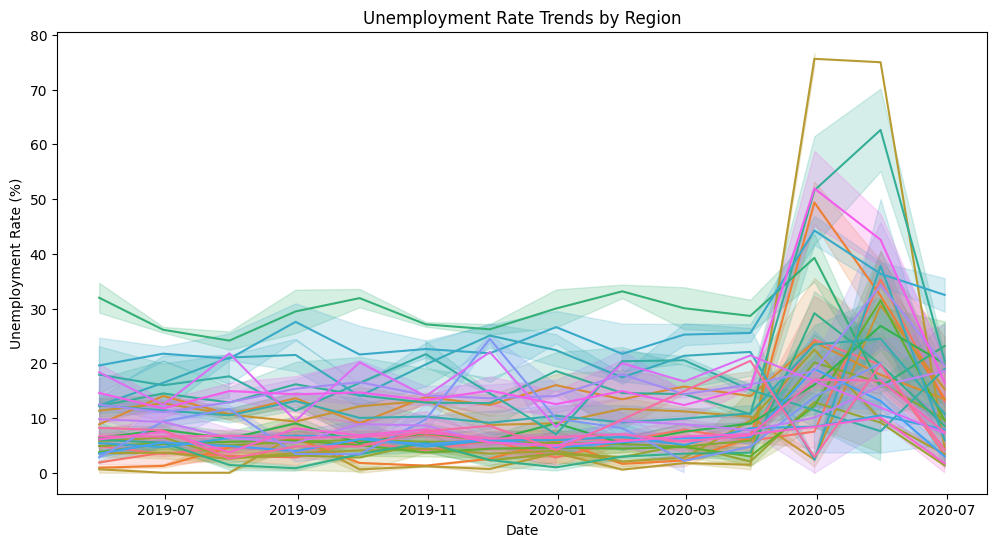

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', legend=False)
plt.title("Unemployment Rate Trends by Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()


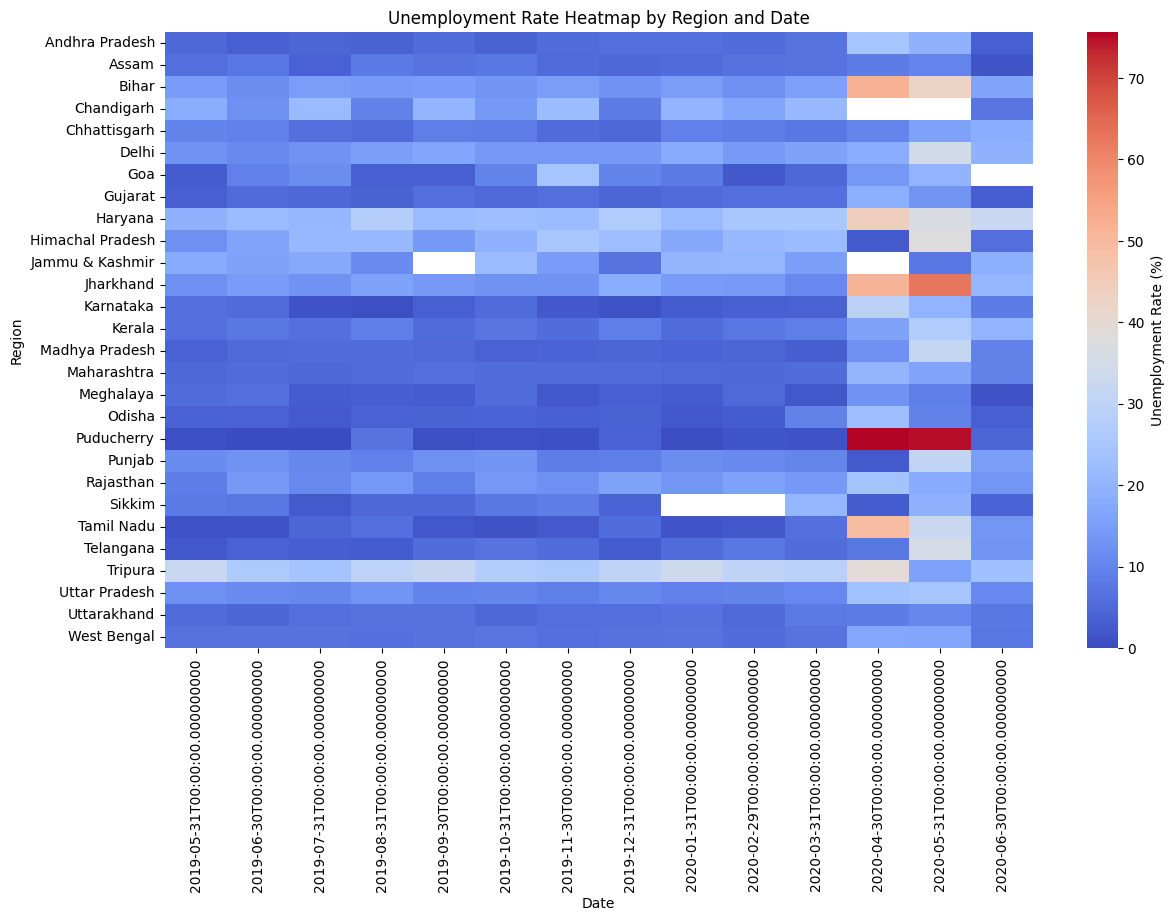

In [17]:
pivot = df.pivot_table(values="Estimated Unemployment Rate (%)",  index="Region",columns="Date")
plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap="coolwarm", cbar_kws={'label': 'Unemployment Rate (%)'})
plt.title("Unemployment Rate Heatmap by Region and Date")
plt.show()


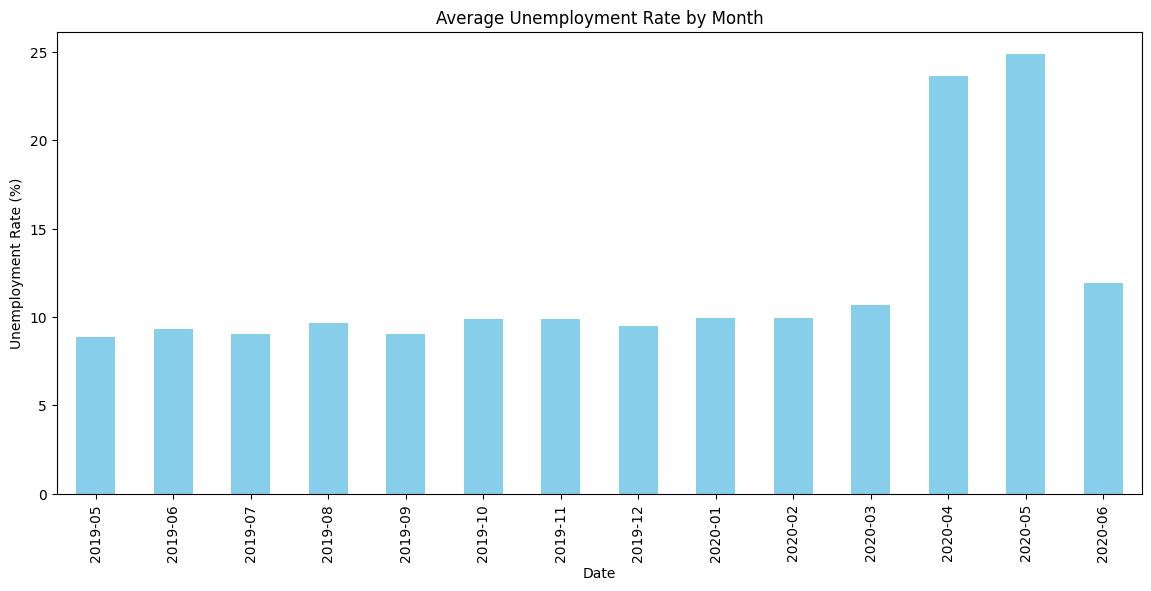

In [18]:
monthly_avg = df.groupby(df['Date'].dt.to_period('M'))["Estimated Unemployment Rate (%)"].mean()
monthly_avg.plot(kind='bar', figsize=(14,6), color='skyblue')
plt.title("Average Unemployment Rate by Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()


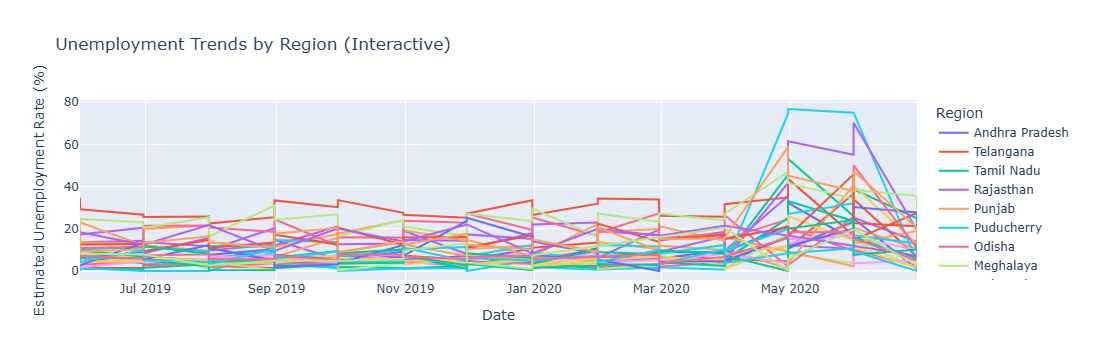

In [23]:
import plotly.express as px
fig = px.line(df, x="Date", y="Estimated Unemployment Rate (%)", color="Region", title="Unemployment Trends by Region (Interactive)")
fig.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13896\3564961056.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




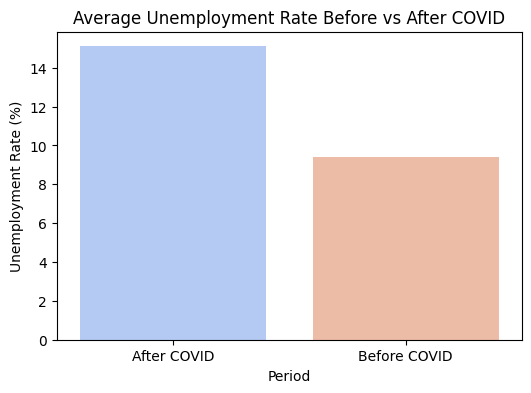

In [26]:
df["Year"] = df["Date"].dt.year  
df["Period"] = df["Year"].apply(lambda x: "Before COVID" if x < 2020 else "After COVID")
period_means = df.groupby("Period")["Estimated Unemployment Rate (%)"].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=period_means, x="Period", y="Estimated Unemployment Rate (%)", palette="coolwarm")
plt.title("Average Unemployment Rate Before vs After COVID")
plt.ylabel("Unemployment Rate (%)")
plt.show()

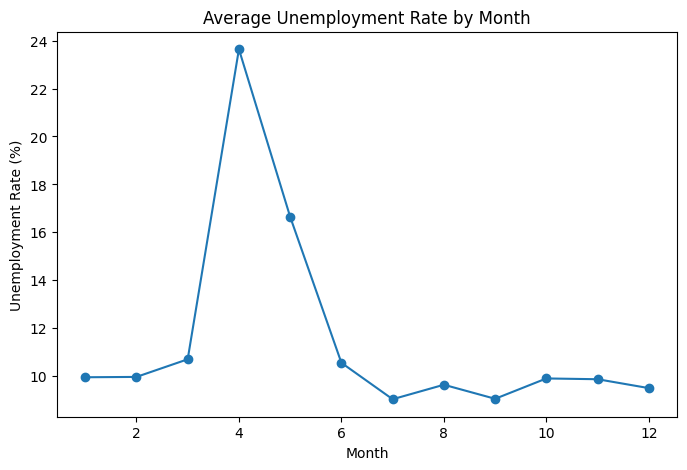

In [27]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')["Estimated Unemployment Rate (%)"].mean()
plt.figure(figsize=(8,5))
monthly_avg.plot(marker='o')
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()
